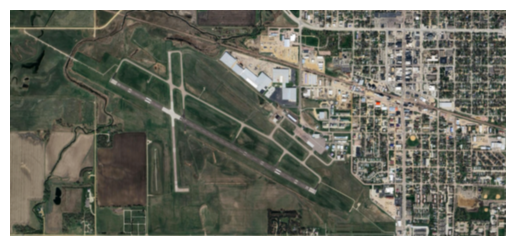

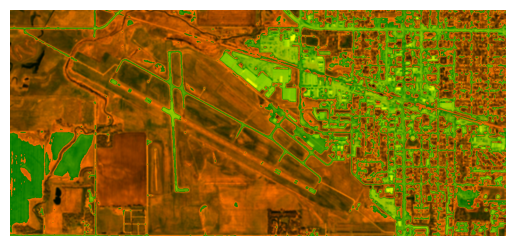

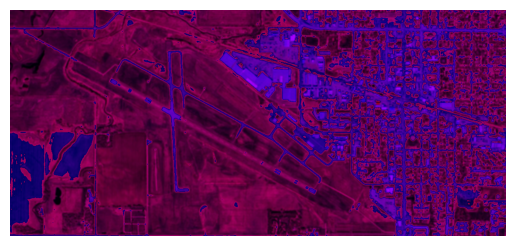

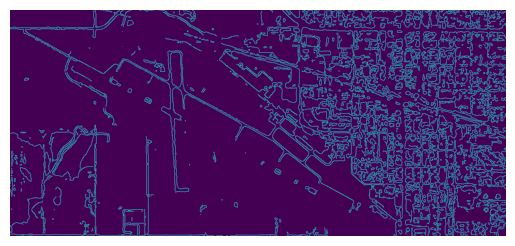

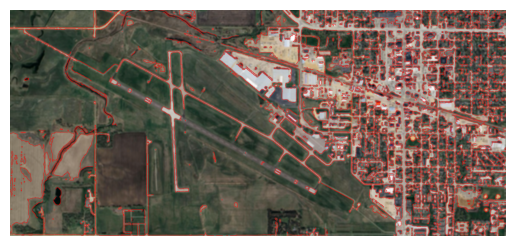

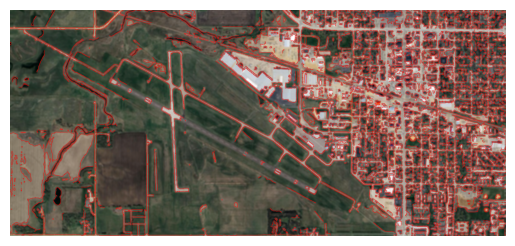

In [1]:
#% Modules
from skimage import color, io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imsave
from scipy.sparse import  spdiags
from scipy.sparse import eye as speye
from scipy.sparse import kron as spkron
import cv2 as cv

from RoadDetect import *
# from scipy.sparse.linalg import spsolve 

def DisplayImage(img, num):
   plt.figure(num)
   plt.imshow(img)
   plt.axis('off')
   plt.show()
   return num+1

def SaveImg(img, name):
   newImg=np.uint8(img)
   io.imsave(name, newImg)


def ImageInput(path):
   img = io.imread(path)
   if (np.ndim(img)==3): 
      if (img.shape[2]==4) :
         img=img[:,:,[0,1,2]]  # 4 channel image to 3 channel
      else:
         imgGray=img
         return imgGray
   return img

def ToUint8(target):
    maxVal=np.max(target)
    minVal=np.min(target)
    rng=maxVal-minVal   
    newImg= 255*(target-minVal)/rng    # rescales to 0 to 255,  but still a floating point # between 0 and 255
    newImg=np.uint8(newImg);     # Converts the float to uint8 
    return newImg


# =================================
# Main script
# get the image from file
figureOrder = 1

COLORCHANNEL = {
    'R': 0,
    'G': 1,
    'B': 2
}

img1 = ImageInput(path='sample3.png')  # read in image  (it is RGB)

# img1 = meanFilter(img1, 3)
img1 = cv.GaussianBlur(img1, (5, 5), 5)


figureOrder = DisplayImage(img1, figureOrder)



R, G, B = ChannelSplit(img1)

#%%
RG = R + G
RB = R + B
GB = G + B

RRG = RG + R
RRB = RB + R + B/2

RRB = ToUint8(RRB)

figureOrder = DisplayImage(RRG, figureOrder)
figureOrder = DisplayImage(RRB, figureOrder)

SaveImg(RRG, 'Result/RRG.png')
SaveImg(RRB, 'Result/RRB.png')

def ColorDrop(img, colorchannel=0, threshold=0.5):
   for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img[i, j, colorchannel] > 0:
            img[i, j, colorchannel] = img[i, j, colorchannel]*threshold 



def EdgeMarker(img, markedMap):
    for i in range(markedMap.shape[0]):
        for j in range(markedMap.shape[1]):
            if markedMap[i, j] > 0:
                img[i, j, 0] = 255
                img[i, j, 1] = 0
                img[i, j, 2] = 0

ColorDrop(RRG, COLORCHANNEL['R'], 0.5)
ColorDrop(RRB, COLORCHANNEL['B'], 0.5)

RRG = cv.Canny(RRG, 100, 200, 3)
RRB = cv.Canny(RRB, 100, 200, 3)

img1_Rmarked = img1.copy()
img1_Bmarked = img1.copy()

EdgeMarker(img1_Rmarked, RRG)
EdgeMarker(img1_Bmarked, RRB)


figureOrder = DisplayImage(RRG, figureOrder)
figureOrder = DisplayImage(img1_Rmarked, figureOrder)
figureOrder = DisplayImage(img1_Bmarked, figureOrder)

SaveImg(img1_Rmarked, 'Result/RMarked.png')
SaveImg(img1_Bmarked, 'Result/BMarked.png')




# SaveImg(output, 'Result\Airport.png')
